In [14]:
import pickle
import numpy as np
fp=open("/content/sample_data/Test-Data Set.txt", "rb")
train_data = pickle.load(fp)

In [15]:
train_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [16]:
fp=open("/content/sample_data/Test-Data Set.txt", "rb")
test_data = pickle.load(fp)

In [17]:
' '.join(train_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [18]:
' '.join(train_data[0][1])

'Is John in the kitchen ?'

In [19]:
vocab= set()
all_data = test_data +train_data
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [22]:
for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union (set(question))


In [23]:
vocab.add('yes')
vocab.add('no')

In [35]:
vocab_len=len(vocab)+1

In [36]:
max_story_len = max([len (data[0]) for data in all_data])

In [37]:
max_ques_len = max([len (data[1]) for data in all_data])
max_ques_len

6

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer =Tokenizer(filters= [])
tokenizer.fit_on_texts (vocab)
tokenizer.word_index

{'left': 1,
 'grabbed': 2,
 'moved': 3,
 'went': 4,
 'no': 5,
 'down': 6,
 'back': 7,
 '.': 8,
 'journeyed': 9,
 'daniel': 10,
 'travelled': 11,
 '?': 12,
 'football': 13,
 'sandra': 14,
 'hallway': 15,
 'up': 16,
 'john': 17,
 'bathroom': 18,
 'the': 19,
 'mary': 20,
 'yes': 21,
 'discarded': 22,
 'office': 23,
 'there': 24,
 'in': 25,
 'kitchen': 26,
 'apple': 27,
 'garden': 28,
 'bedroom': 29,
 'dropped': 30,
 'got': 31,
 'put': 32,
 'is': 33,
 'took': 34,
 'milk': 35,
 'to': 36,
 'picked': 37}

In [39]:
train_story_text= []
train_question_text = []
train_answers = []
for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
train_story_seq= tokenizer.texts_to_sequences (train_story_text)

In [43]:
def vectorize_stories (data, word_index = tokenizer.word_index,max_story_len = max_story_len, max_ques_len = max_ques_len):
  X= []
  Xq = []
  Y = []
  for story, query, answer in data:
    x= [word_index [word.lower()] for word in story]
    xq = [word_index [word.lower()] for word in query]
    y = np.zeros(len (word_index) +1)
    y[word_index[answer]] =1
    X.append(x)
    Xq.append(xq)
    Y.append(y)
  return(pad_sequences (X, maxlen = max_story_len),pad_sequences (Xq, maxlen=max_ques_len),np.array(Y) )

In [44]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test= vectorize_stories(test_data)

In [48]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM
input_sequence = Input ((max_story_len,))
question = Input ((max_ques_len,))
#Input Encoder in
input_encoder_m= Sequential()
input_encoder_m.add(Embedding (input_dim=vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [49]:
input_encoder_c= Sequential()
input_encoder_c.add(Embedding (input_dim=vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))
#Question Encoder
question_encoder= Sequential()
question_encoder.add(Embedding (input_dim = vocab_len, output_dim = 64, input_length =max_ques_len))
question_encoder.add(Dropout(0.3))

In [54]:
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded=question_encoder (question)
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation ('softmax') (match)
response=add([match, input_encoded_c])
response = Permute ((2,1)) (response)
#Concatenate
answer = concatenate ([response, question_encoded])

In [55]:
answer = LSTM(32) (answer)
answer = Dropout(0.5) (answer)
answer = Dense(vocab_len) (answer)
answer = Activation ('softmax') (answer)
model = Model([input_sequence, question], answer )
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 86)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [56]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size= 32, epochs =20,validation_data = ([inputs_test, queries_test], answers_test))

Epoch 1/20
32/32 [==============================] - 4s 33ms/step - loss: 1.9806 - accuracy: 0.4450 - val_loss: 0.9543 - val_accuracy: 0.4970
Epoch 2/20
32/32 [==============================] - 0s 14ms/step - loss: 1.0142 - accuracy: 0.4990 - val_loss: 0.7648 - val_accuracy: 0.4970
Epoch 3/20
32/32 [==============================] - 0s 15ms/step - loss: 0.8810 - accuracy: 0.5090 - val_loss: 0.7273 - val_accuracy: 0.5030
Epoch 4/20
32/32 [==============================] - 1s 16ms/step - loss: 0.8179 - accuracy: 0.5020 - val_loss: 0.7557 - val_accuracy: 0.4970
Epoch 5/20
32/32 [==============================] - 1s 16ms/step - loss: 0.7972 - accuracy: 0.4960 - val_loss: 0.7016 - val_accuracy: 0.5480
Epoch 6/20
32/32 [==============================] - 0s 14ms/step - loss: 0.7515 - accuracy: 0.4970 - val_loss: 0.7055 - val_accuracy: 0.5030
Epoch 7/20
32/32 [==============================] - 1s 17ms/step - loss: 0.7412 - accuracy: 0.5250 - val_loss: 0.6955 - val_accuracy: 0.5570
Epoch 8/20
32

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

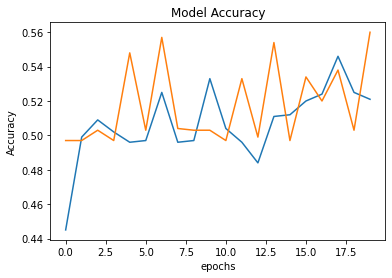

In [59]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")